In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [4]:
tesla = yf.Ticker("TSLA")

In [5]:
tesla_data = tesla.history(period='max')

In [7]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [19]:
url ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [16]:
soup = BeautifulSoup(html_data, "html5lib")

In [76]:
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])

In [78]:
for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text
    
    tesla_revenue = tesla_revenue.append({"Date":Date,"Revenue":Revenue}, ignore_index=True)

C:\Users\senio\AppData\Local\Temp\ipykernel_432\1090502922.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":Date,"Revenue":Revenue}, ignore_index=True)
C:\Users\senio\AppData\Local\Temp\ipykernel_432\1090502922.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":Date,"Revenue":Revenue}, ignore_index=True)
C:\Users\senio\AppData\Local\Temp\ipykernel_432\1090502922.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":Date,"Revenue":Revenue}, ignore_index=True)
C:\Users\senio\AppData\Local\Temp\ipykernel_432\1090502922.py:6: FutureWarning: The frame.append method is deprecated and will be rem

,Date,Revenue
0,2009-06-30,$27
1,2022-09-30,"$21,454"
2,2022-06-30,"$16,934"
3,2022-03-31,"$18,756"
4,2021-12-31,"$17,719"
5,2021-09-30,"$13,757"
6,2021-06-30,"$11,958"
7,2021-03-31,"$10,389"
8,2020-12-31,"$10,744"
9,2020-09-30,"$8,771"


In [98]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

C:\Users\senio\AppData\Local\Temp\ipykernel_432\4188397710.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\senio\AppData\Local\Temp\ipykernel_432\4188397710.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\senio\AppData\Local\Temp\ipykernel_432\4188397710.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
tesla_revenue.tail()

,Date,Revenue
49,2010-09-30,31
50,2010-06-30,28
51,2010-03-31,21
53,2009-09-30,46
54,2009-06-30,27


In [86]:
gamestop = yf.Ticker("GME")

In [87]:
gme_data = gamestop.history(period='max')

In [88]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670627,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [89]:
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url2).text

In [90]:
soup = BeautifulSoup(html_data, "html5lib")

In [91]:
gme_revenue = pd.DataFrame(columns=["Date","Revenue"])

In [92]:
for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text
    
    gme_revenue = gme_revenue.append({"Date":Date,"Revenue":Revenue}, ignore_index=True)

C:\Users\senio\AppData\Local\Temp\ipykernel_432\3487856716.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":Date,"Revenue":Revenue}, ignore_index=True)
C:\Users\senio\AppData\Local\Temp\ipykernel_432\3487856716.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":Date,"Revenue":Revenue}, ignore_index=True)
C:\Users\senio\AppData\Local\Temp\ipykernel_432\3487856716.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":Date,"Revenue":Revenue}, ignore_index=True)
C:\Users\senio\AppData\Local\Temp\ipykernel_432\3487856716.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pa

In [101]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")


C:\Users\senio\AppData\Local\Temp\ipykernel_432\844804335.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [102]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


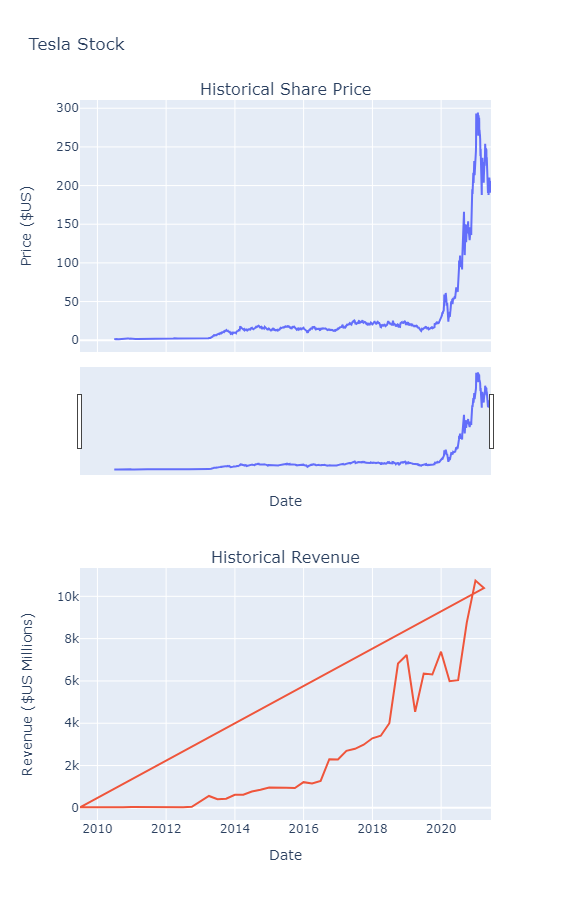

In [104]:
make_graph(tesla_data, tesla_revenue, 'Tesla Stock')

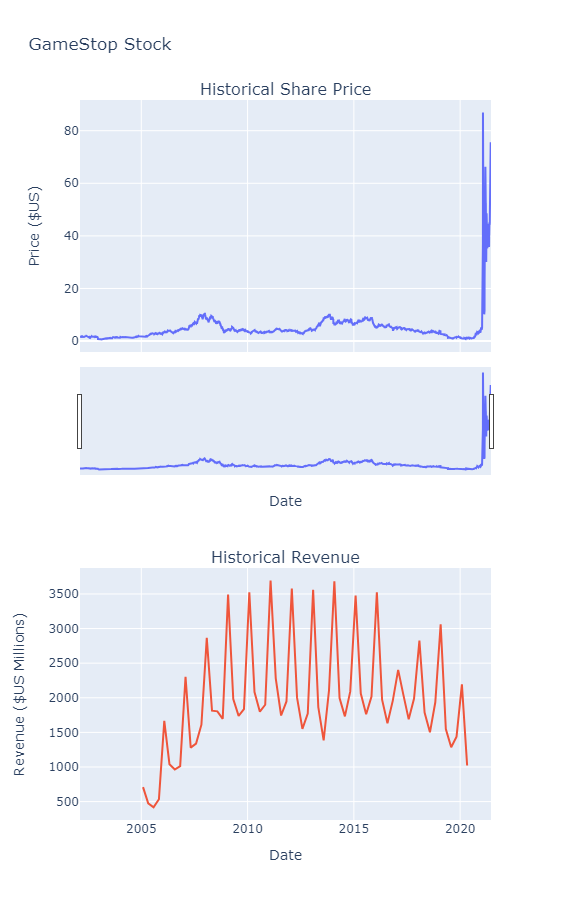

In [105]:
make_graph(gme_data, gme_revenue, 'GameStop Stock')